> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Investigating How Suicide Rates Vary With Socioeconomic Factors

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analysing how suicide rates vary based on a nation's level of corruption, democracy and freedom of expression.

### Datasets and Indicators

I compiled my datasets using [Gapminder Tools](https://www.gapminder.org/data/), which contains data, broken down by country, on a wide range of indicators.
As the indicators I have chosen are not quantative, I have opted to use the following indices/scores in order to quantify the data:

- **Corruption Perception Index (CPI)** - This index, calculated by [Transparency International](https://www.transparency.org/research/cpi), is a measure of the level of corruption in a country. It is based on a scale of 0 to 100, with zero indicating a "Highly Corrupt" nation, and 100 indication a nation is "Very Clean".
- **Democracy Index (EIU)** - From the [Economist Inteligence Nuit](http://gapm.io/ddemocrix_eiu), this is a summary measure to express the quality of a country's democratic nature, calculated using 60 indicators. Graded from 0 to 100, with 0 indicating a very low level of democracy, and 100 indicating a very high democratic nature.
- **Freedom of Expression Index (IDEA)** - Available [here](http://gapm.io/ddemocrix_idea), this aggregates a set of indicators measuring media censorship and freedom of discussion and expression. Measued on a scale of 0 to 100, with 0 suggesting no freedom of expression at all, and 100 suggesting full access to freedom of expression.

The suicide rate dataset from the [World Health Organisation](http://apps.who.int/ghodata/) contains the number of suicides per 100,000 population. This will allow me to compare suiciderates relative to the size of population of a country.

All of these datasets include historical data, however I am not interested in trends in any of these indicators so can discard all but the most recent year (that all indicators have data for).

### Questions

I shall be analysing the distribution of countries' suicide rates, and the relationship between suicide rates and the above indicators.
My questions are:

- How are suicide rates distributed, and how do they range between different countries?
- Is there a correlation between the level of corruption, democracy or freedom of a country, and the suicide rate?

In [1]:
from functools import reduce
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [23]:
# Load Data
suicide_df    = pd.read_csv('suicide.csv')
corruption_df = pd.read_csv('corruption.csv')
democracy_df  = pd.read_csv('democracy.csv')
freedom_df    = pd.read_csv('freedom.csv')

#### Suicide Data

In [24]:
display(suicide_df.describe())
display(suicide_df.head())

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,183.000000,0.0,0.0,0.0,0.0,183.000000,0.0,0.0,0.0,0.0,183.000000,0.0,0.0,0.0,0.0,183.000000,183.000000
mean,10.836612,NaN,NaN,NaN,NaN,10.342623,NaN,NaN,NaN,NaN,9.845355,NaN,NaN,NaN,NaN,9.382514,9.271038
std,8.547027,NaN,NaN,NaN,NaN,8.043586,NaN,NaN,NaN,NaN,7.169561,NaN,NaN,NaN,NaN,6.201065,5.988412
min,1.300000,NaN,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,NaN,0.700000,0.500000
25%,5.400000,NaN,NaN,NaN,NaN,4.950000,NaN,NaN,NaN,NaN,5.050000,NaN,NaN,NaN,NaN,4.800000,4.700000
50%,8.600000,NaN,NaN,NaN,NaN,8.400000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,8.100000,7.900000
75%,13.300000,NaN,NaN,NaN,NaN,12.500000,NaN,NaN,NaN,NaN,12.650000,NaN,NaN,NaN,NaN,12.450000,12.550000
max,52.600000,NaN,NaN,NaN,NaN,51.600000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,34.900000,31.900000


,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,5.7,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,5.1,NaN,NaN,NaN,NaN,4.8,4.7
1,Albania,5.5,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,6.0,6.3
2,Algeria,4.1,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,3.2,3.2
3,Angola,7.9,NaN,NaN,NaN,NaN,7.2,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,5.0,4.7
4,Antigua and Barbuda,2.0,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,0.8,0.5


The newest data is from 2016, so I will take this as the most recent year of data that I can analyse.

#### Corruption Data

In [25]:
display(corruption_df['2016'].describe())
display(corruption_df.head())

count    173.000000
mean      42.687861
std       19.374994
min       10.000000
25%       29.000000
50%       38.000000
75%       56.000000
max       90.000000
Name: 2016, dtype: float64

,country,2012,2013,2014,2015,2016,2017
0,Afghanistan,8.0,8.0,12.0,11.0,15.0,15
1,Albania,33.0,31.0,33.0,36.0,39.0,38
2,Algeria,34.0,36.0,36.0,36.0,34.0,33
3,Angola,22.0,23.0,19.0,15.0,18.0,19
4,Argentina,35.0,34.0,34.0,32.0,36.0,39


As we can see, there are 173 unique countries with data existing in the 2016 column.

#### Democracy Data

In [26]:
display(democracy_df['2016'].describe())
display(democracy_df.head())

count    164.000000
mean      54.982317
std       22.081302
min       10.800000
25%       35.550000
50%       57.100000
75%       72.525000
max       99.300000
Name: 2016, dtype: float64

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,30.6,30.4,30.2,27.5,24.8,24.8,24.8,24.8,27.7,27.7,25.5,25.5,29.7
1,Albania,59.1,59.1,59.1,58.9,58.6,58.1,56.7,56.7,56.7,59.1,59.1,59.8,59.8
2,Algeria,31.7,32.5,33.2,33.8,34.4,34.4,38.3,38.3,38.3,39.5,35.6,35.6,35.0
3,Angola,24.1,28.8,33.5,33.4,33.2,33.2,33.5,33.5,33.5,33.5,34.0,36.2,36.2
4,Argentina,66.3,66.3,66.3,67.3,68.4,68.4,68.4,68.4,68.4,70.2,69.6,69.6,70.2


Here we can see that the democracy data does indeed have data for 2016, however only has 164 unique countries present that year.

#### Freedom of Expression Data

In [27]:
display(freedom_df['2016'].describe())
display(freedom_df.head())

count    155.000000
mean      60.774194
std       21.144079
min        2.000000
25%       47.500000
50%       64.000000
75%       76.500000
max       93.000000
Name: 2016, dtype: float64

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,35.0,35.0,35.0,23.0,20.0,20.0,22.0,22.0,22.0,...,53.0,52.0,52,51,52,52,52,50,51,55
1,Albania,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,71.0,71.0,71,71,64,65,65,65,69,62
2,Algeria,34.0,34.0,34.0,34.0,34.0,36.0,36.0,36.0,36.0,...,58.0,57.0,57,52,57,56,56,53,55,56
3,Angola,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,20.0,...,46.0,46.0,46,46,47,47,47,47,51,53
4,Argentina,52.0,24.0,14.0,14.0,14.0,14.0,14.0,17.0,33.0,...,78.0,77.0,77,77,78,78,76,83,82,82


Finally, this shows us that the freedom data only includes 155 countries for the year of 2016.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

As I decided previously, I will only be working with data from 2016.

In order to clean the data, I need to:
- Discard the unused years in all datasets, keeping only the 2016 columns
- Discard all rows in all datasets with missing values
- Rename the 2016 columns to include the name of the data they reference (in order to distinguish once combined)
- Combine all data into one dataset using an inner merge on the `country` column

#### Discard Unused Columns

In [28]:
# Columns to keep
columns = ['country', '2016']

suicide_df = suicide_df.filter(columns)
corruption_df = corruption_df.filter(columns)
democracy_df = democracy_df.filter(columns)
freedom_df = freedom_df.filter(columns)

#### Discard Rows with Missing Values

In [8]:
# Drop all rows with missing values
suicide_df.dropna(inplace=True)
corruption_df.dropna(inplace=True)
democracy_df.dropna(inplace=True)
freedom_df.dropna(inplace=True)

#### Rename Columns

In [29]:
suicide_df.rename(columns={'2016': 'suicide_rate'}, inplace=True)
corruption_df.rename(columns={'2016': 'corruption'}, inplace=True)
democracy_df.rename(columns={'2016': 'democracy'}, inplace=True)
freedom_df.rename(columns={'2016': 'freedom'}, inplace=True)

#### Combine Datasets

In [30]:
# Inner merge two dataframes on the "country" column
def merge(left, right):
    return pd.merge(left, right, on='country', how='inner')

dataframes = [suicide_df, corruption_df, democracy_df, freedom_df]
combined_df = reduce(merge, dataframes)

combined_df.head()

,country,suicide_rate,corruption,democracy,freedom
0,Afghanistan,4.7,15.0,25.5,50
1,Albania,6.3,39.0,59.1,65
2,Algeria,3.2,34.0,35.6,53
3,Angola,4.7,18.0,34.0,47
4,Argentina,9.2,36.0,69.6,83


In [31]:
combined_df['country'].nunique()

152

The data is now free of all missing values, and combined into one dataframe, with separate columns for the suicide rate, level of corruption, democracy and freedom. There are 152 countries that had data saved in all four datasets, and hence those are what I am left with.

Ideally there would be more data, however I am limited by the low number of countries suicide rates were recorded for.

This data is now fully cleaned and ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

### How are suicide rates distributed, and how do they range between different countries?

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Is there a correlation between the level of corruption, democracy or freedom of a country, and the suicide rate?

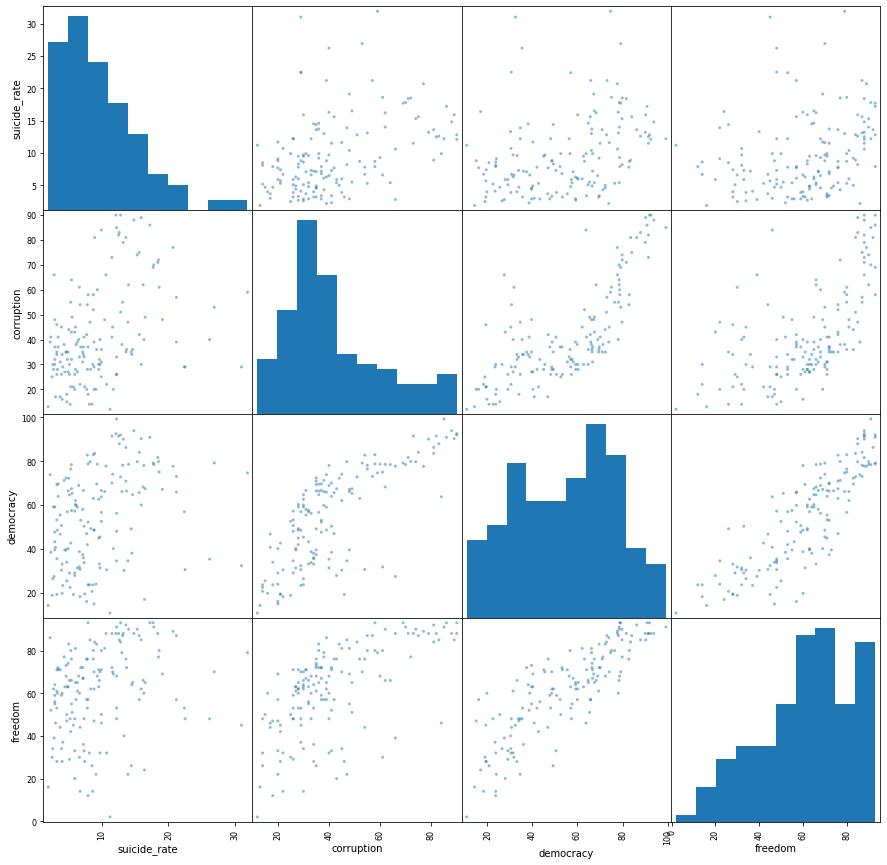

In [32]:
pd.plotting.scatter_matrix(combined_df, figsize=(15, 15));

In [13]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!